#Kaggle connection

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d zeesolver/consumer-behavior-and-shopping-habits-dataset

Dataset URL: https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset
License(s): CC0-1.0
  0% 0.00/146k [00:00<?, ?B/s]
100% 146k/146k [00:00<00:00, 54.2MB/s]


In [6]:
! unzip consumer-behavior-and-shopping-habits-dataset.zip

Archive:  consumer-behavior-and-shopping-habits-dataset.zip
  inflating: shopping_behavior_updated.csv  
  inflating: shopping_trends.csv     


## ChatGPT

### Promt:
By using pandas, matplotlib and other necessary libraries.
1. Investigate average purchase amounts by product category, season, and location.
2. Examine the relationship between the use of promo codes and purchase amounts to determine if promotions lead to larger transactions.
3. Investigate the popularity of different payment methods (e.g., Venmo, PayPal) and how they relate to purchase frequency or amount.

### 1. Investigate Average Purchase Amounts by Product Category, Season, and Location

<ipython-input-7-970aa0e391f9>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_purchase, x='Category', y='Purchase Amount (USD)', hue='Season', ci=None)


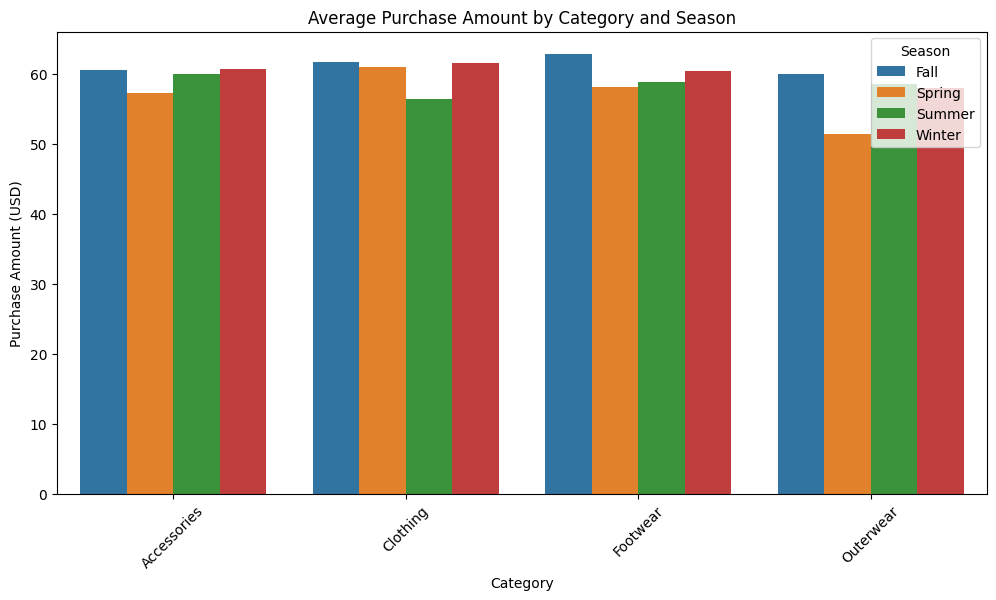

<ipython-input-7-970aa0e391f9>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=avg_purchase, x='Location', y='Purchase Amount (USD)', hue='Category', ci=None)


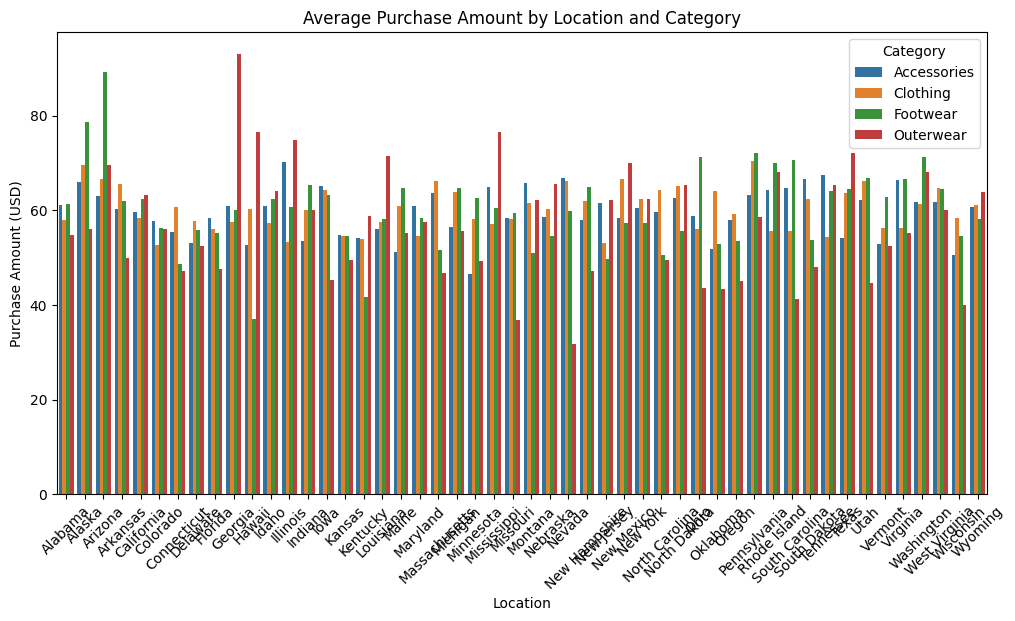

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is in a CSV file
df = pd.read_csv('shopping_behavior_updated.csv')

# Grouping by Category, Season, and Location and calculating average purchase amount
avg_purchase = df.groupby(['Category', 'Season', 'Location'])['Purchase Amount (USD)'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_purchase, x='Category', y='Purchase Amount (USD)', hue='Season', ci=None)
plt.title('Average Purchase Amount by Category and Season')
plt.xticks(rotation=45)
plt.show()

# Average purchase amount by Location
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_purchase, x='Location', y='Purchase Amount (USD)', hue='Category', ci=None)
plt.title('Average Purchase Amount by Location and Category')
plt.xticks(rotation=45)
plt.show()


### 2. Examine the Relationship Between the Use of Promo Codes and Purchase Amounts

<ipython-input-8-c5b581a7cfe9>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=promo_analysis, x='Promo Code Used', y='Purchase Amount (USD)', ci=None)


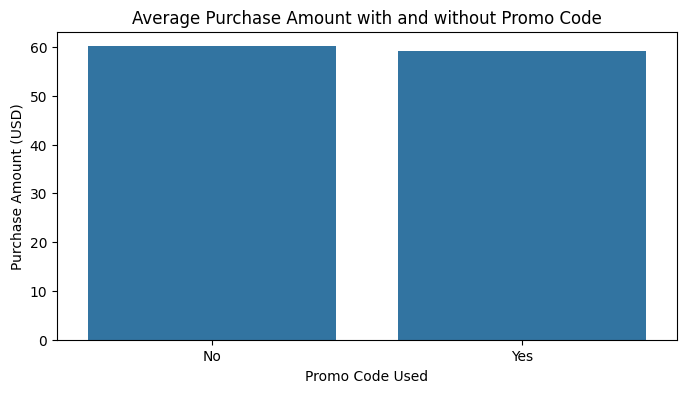

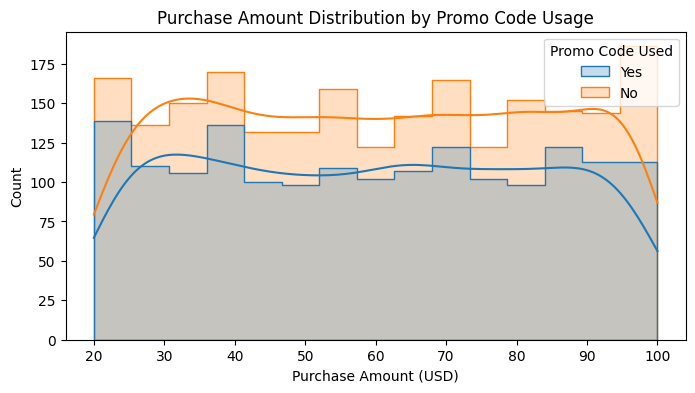

In [8]:
# Grouping by Promo Code Usage and calculating average purchase amount
promo_analysis = df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=promo_analysis, x='Promo Code Used', y='Purchase Amount (USD)', ci=None)
plt.title('Average Purchase Amount with and without Promo Code')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Distribution of purchase amounts with and without promo codes
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Purchase Amount (USD)', hue='Promo Code Used', kde=True, element='step')
plt.title('Purchase Amount Distribution by Promo Code Usage')
plt.show()

In [14]:
df_behavior = pd.read_csv('shopping_behavior_updated.csv')
df_trends = pd.read_csv('shopping_trends.csv')

# Merge the datasets on Customer ID (or any relevant key)
df = pd.merge(df_behavior, df_trends, on='Customer ID')

# Check the structure of the combined dataframe
print(df.head())

   Customer ID  Age_x Gender_x Item Purchased_x Category_x  \
0            1     55     Male           Blouse   Clothing   
1            2     19     Male          Sweater   Clothing   
2            3     50     Male            Jeans   Clothing   
3            4     21     Male          Sandals   Footwear   
4            5     45     Male           Blouse   Clothing   

   Purchase Amount (USD)_x     Location_x Size_x    Color_x Season_x  ...  \
0                       53       Kentucky      L       Gray   Winter  ...   
1                       64          Maine      L     Maroon   Winter  ...   
2                       73  Massachusetts      S     Maroon   Spring  ...   
3                       90   Rhode Island      M     Maroon   Spring  ...   
4                       49         Oregon      M  Turquoise   Spring  ...   

   Season_y Review Rating_y Subscription Status_y Payment Method_y  \
0    Winter             3.1                   Yes      Credit Card   
1    Winter             

### 3. Investigate the Popularity of Payment Methods and How They Relate to Purchase Frequency or Amount

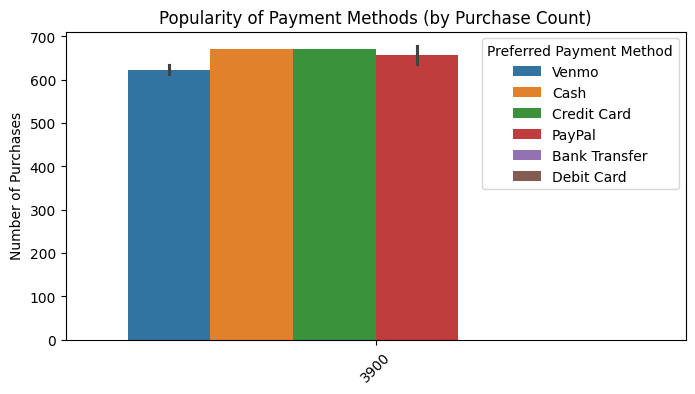

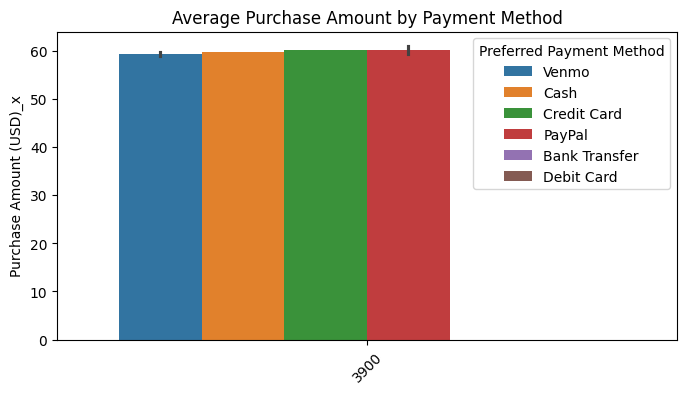

In [22]:
# Grouping by Payment Method and calculating purchase frequency and average purchase amount
payment_analysis = df.groupby('Preferred Payment Method').agg({
    'Purchase Amount (USD)_x': 'mean',
    'Customer ID': 'count',  # assuming Customer ID is unique
    'Frequency of Purchases_y': 'value_counts'  # to explore how often each payment method is used
}).reset_index()

# Plotting the popularity of each payment method based on purchase count
plt.figure(figsize=(8, 4))
sns.barplot(data=payment_analysis, x=df['Preferred Payment Method'].count(), y='Customer ID', hue=df['Preferred Payment Method'])
plt.title('Popularity of Payment Methods (by Purchase Count)')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Plotting the average purchase amount by payment method
plt.figure(figsize=(8, 4))
sns.barplot(data=payment_analysis, x=df['Preferred Payment Method'].count(), y='Purchase Amount (USD)_x', hue=df['Preferred Payment Method'])
plt.title('Average Purchase Amount by Payment Method')
plt.xticks(rotation=45)
plt.show()
